<a href="https://colab.research.google.com/github/devdebdeb/ML-Classificacao/blob/main/Semi-Supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.semi_supervised import SelfTrainingClassifier

# Milk

## Data

In [3]:
data = pd.read_csv('/content/qualidade_leite.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pH           1059 non-null   float64
 1   Temperatura  1059 non-null   int64  
 2   Sabor        1059 non-null   int64  
 3   Odor         1059 non-null   int64  
 4   Gordura      1059 non-null   int64  
 5   Turbidez     1059 non-null   int64  
 6   Cor          1059 non-null   int64  
 7   Qualidade    424 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [5]:
data['Qualidade'].value_counts(dropna=False)

,count
Qualidade,
NaN,635
baixa,184
média,149
alta,91


In [6]:
data.describe()

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [7]:
data.isnull().sum()

,0
pH,0
Temperatura,0
Sabor,0
Odor,0
Gordura,0
Turbidez,0
Cor,0
Qualidade,635


In [8]:
data

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor,Qualidade
0,6.6,35,1,0,1,0,254,alta
1,6.6,36,0,1,0,1,253,alta
2,8.5,70,1,1,1,1,246,NaN
3,9.5,34,1,1,0,1,255,NaN
4,6.6,37,0,0,0,0,255,média
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,NaN
1055,6.7,38,1,0,1,0,255,NaN
1056,3.0,40,1,1,1,1,255,NaN
1057,6.8,43,1,0,1,0,250,NaN


## Supervised Learning

### Pre Processamento

In [9]:
labeled_data = data.dropna()

In [10]:
labeled_data

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor,Qualidade
0,6.6,35,1,0,1,0,254,alta
1,6.6,36,0,1,0,1,253,alta
4,6.6,37,0,0,0,0,255,média
6,5.5,45,1,0,1,1,250,baixa
7,4.5,60,0,1,1,1,250,baixa
...,...,...,...,...,...,...,...,...
1047,6.8,45,1,1,1,0,245,alta
1048,9.5,34,1,1,0,1,255,baixa
1049,6.5,37,0,0,0,0,255,média
1052,6.5,40,1,0,0,0,250,média


In [11]:
X = labeled_data.drop('Qualidade', axis=1)
y = labeled_data['Qualidade']

In [12]:
labeled_data['Qualidade'].value_counts(dropna=False)

,count
Qualidade,
baixa,184
média,149
alta,91


In [13]:
le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
y

array([0, 0, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0,
       2, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1,
       1, 0, 2, 2, 1, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1,
       2, 1, 1, 2, 1, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 2, 0, 1, 1,
       0, 2, 1, 1, 2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2,
       0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 2, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 0, 1, 0, 2, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 2, 0, 1,
       1, 1, 1, 2, 1, 2, 0, 2, 1, 1, 1, 2, 1, 2, 0, 1, 0, 2, 1, 2, 1, 2,
       0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0,
       1, 2, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 1, 2,
       0, 1, 0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2,
       0, 2, 1, 0, 1, 2, 0, 2, 0, 2, 1, 0, 2, 2, 0,

In [15]:
# Descrição das variáveis explicativas
le.inverse_transform([0,1,2])

array(['alta', 'baixa', 'média'], dtype=object)

In [16]:
mm_scaler = MinMaxScaler()

In [17]:
X_scaled = pd.DataFrame(mm_scaler.fit_transform(X), columns=X.columns)
X_scaled

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor
0,0.553846,0.017857,1.0,0.0,1.0,0.0,0.933333
1,0.553846,0.035714,0.0,1.0,0.0,1.0,0.866667
2,0.553846,0.053571,0.0,0.0,0.0,0.0,1.000000
3,0.384615,0.196429,1.0,0.0,1.0,1.0,0.666667
4,0.230769,0.464286,0.0,1.0,1.0,1.0,0.666667
...,...,...,...,...,...,...,...
419,0.584615,0.196429,1.0,1.0,1.0,0.0,0.333333
420,1.000000,0.000000,1.0,1.0,0.0,1.0,1.000000
421,0.538462,0.053571,0.0,0.0,0.0,0.0,1.000000
422,0.538462,0.107143,1.0,0.0,0.0,0.0,0.666667


### Modelo

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10)

In [19]:
svm = SVC(kernel='linear', random_state=10)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [20]:
svm_results = classification_report(y_test, y_pred)

## Semi-Supervised Learning

### y_pred

In [21]:
data['Qualidade'].isna()

,Qualidade
0,False
1,False
2,True
3,True
4,False
...,...
1054,True
1055,True
1056,True
1057,True


In [22]:
unlabeled_data = data[data['Qualidade'].isna()].drop('Qualidade', axis=1)

In [23]:
unlabeled_normalized = pd.DataFrame(mm_scaler.transform(unlabeled_data), columns = unlabeled_data.columns)

In [24]:
y_pred = svm.predict(unlabeled_normalized)

In [25]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 0, 1,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1,
       2, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1,
       2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 1,
       2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1,
       2, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0,

### Pseudo Labeling

In [26]:
X_train = pd.concat([X_train, unlabeled_normalized], ignore_index=True)
X_train

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor
0,0.584615,0.017857,1.0,0.0,1.0,0.0,0.400000
1,0.538462,0.035714,0.0,0.0,0.0,0.0,0.466667
2,0.538462,0.017857,1.0,0.0,1.0,0.0,0.400000
3,0.569231,0.071429,1.0,0.0,1.0,0.0,1.000000
4,0.553846,0.196429,0.0,1.0,1.0,1.0,0.666667
...,...,...,...,...,...,...,...
948,0.784615,0.571429,1.0,0.0,1.0,1.0,1.000000
949,0.569231,0.196429,1.0,1.0,0.0,0.0,0.466667
950,0.569231,0.071429,1.0,0.0,1.0,0.0,1.000000
951,0.000000,0.107143,1.0,1.0,1.0,1.0,1.000000


In [27]:
y_train = pd.concat([pd.Series(y_train), pd.Series(y_pred)], ignore_index=True)
y_train

,0
0,2
1,2
2,2
3,0
4,0
...,...
948,1
949,1
950,0
951,1


In [28]:
pseudo_labeling = SVC(kernel='linear', random_state=10)
pseudo_labeling.fit(X_train, y_train)

SVC(kernel='linear', random_state=10)

In [29]:
y_pred = pseudo_labeling.predict(X_test)
pseudo_labeling_results = classification_report(y_test, y_pred)

In [30]:
print('SVM Supervisionado')
print(svm_results)
print('-'*50)
print('SVM Pseudo Labeling')
print(pseudo_labeling_results)

SVM Supervisionado
              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.67      0.91      0.77        46
           2       0.90      0.76      0.82        37

    accuracy                           0.75       106
   macro avg       0.77      0.69      0.70       106
weighted avg       0.77      0.75      0.73       106

--------------------------------------------------
SVM Pseudo Labeling
              precision    recall  f1-score   support

           0       0.69      0.39      0.50        23
           1       0.66      0.87      0.75        46
           2       0.88      0.76      0.81        37

    accuracy                           0.73       106
   macro avg       0.74      0.67      0.69       106
weighted avg       0.74      0.73      0.72       106



## Self Training Manual

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10)

In [32]:
svm = SVC(kernel='linear', probability=True, random_state=10)
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=10)

In [33]:
prob = svm.predict_proba(unlabeled_normalized)
y_pred = svm.predict(unlabeled_normalized)

In [34]:
tabela_results = pd.DataFrame(prob, columns=['Prob C0', 'Prob C1', 'Prob C2'])
tabela_results['Previsão'] = y_pred
tabela_results['Probabilidade máxima'] = tabela_results[['Prob C0', 'Prob C1', 'Prob C2']].max(axis=1)

In [35]:
tabela_results.describe()

,Prob C0,Prob C1,Prob C2,Previsão,Probabilidade máxima
count,635.000000,635.000000,635.000000,635.000000,635.000000
mean,0.228486,0.474659,0.296855,1.141732,0.737702
std,0.212268,0.314674,0.361647,0.639455,0.156273
min,0.000062,0.005710,0.000325,0.000000,0.428600
25%,0.026729,0.153571,0.002348,1.000000,0.588868
50%,0.157071,0.506534,0.090363,1.000000,0.743524
75%,0.381198,0.743873,0.597730,2.000000,0.869356
max,0.721187,0.982710,0.994228,2.000000,0.994228


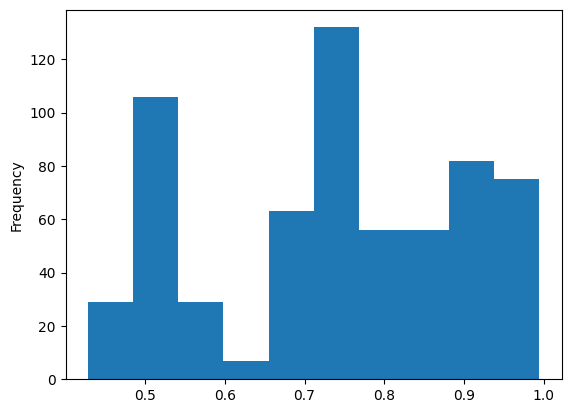

In [36]:
tabela_results['Probabilidade máxima'].plot(kind = 'hist');

In [37]:
tabela_results['Probabilidade máxima']>0.75

,Probabilidade máxima
0,True
1,False
2,False
3,True
4,False
...,...
630,True
631,False
632,False
633,False


In [38]:
filtro_confianca = tabela_results['Probabilidade máxima']>0.75
X_train = pd.concat([X_train, unlabeled_normalized[filtro_confianca]])
y_train = pd.concat([pd.Series(y_train), tabela_results.loc[filtro_confianca, 'Previsão']])

In [39]:
X_train

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor
9,0.584615,0.017857,1.0,0.0,1.0,0.0,0.400000
191,0.538462,0.035714,0.0,0.0,0.0,0.0,0.466667
103,0.538462,0.017857,1.0,0.0,1.0,0.0,0.400000
347,0.569231,0.071429,1.0,0.0,1.0,0.0,1.000000
137,0.553846,0.196429,0.0,1.0,1.0,1.0,0.666667
...,...,...,...,...,...,...,...
625,0.553846,0.285714,0.0,0.0,0.0,1.0,0.666667
626,0.538462,0.035714,0.0,0.0,0.0,0.0,0.466667
627,0.553846,0.071429,0.0,0.0,0.0,0.0,1.000000
629,0.384615,0.196429,1.0,0.0,1.0,1.0,0.666667


In [40]:
svm = SVC(kernel='linear', probability=True, random_state=10)
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=10)

In [41]:
y_pred = svm.predict(X_test)
results_self_training1 = classification_report(y_test, y_pred)

In [42]:
print('SVM Supervisionado')
print(svm_results)
print('-'*50)
print('SVM Self Training 1º estágio')
print(results_self_training1)

SVM Supervisionado
              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.67      0.91      0.77        46
           2       0.90      0.76      0.82        37

    accuracy                           0.75       106
   macro avg       0.77      0.69      0.70       106
weighted avg       0.77      0.75      0.73       106

--------------------------------------------------
SVM Self Training 1º estágio
              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.72      0.91      0.81        46
           2       0.92      0.89      0.90        37

    accuracy                           0.79       106
   macro avg       0.80      0.73      0.74       106
weighted avg       0.80      0.79      0.78       106



## Self Training Model

In [43]:
pd.Series([-1]*unlabeled_normalized.shape[0])

,0
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
630,-1
631,-1
632,-1
633,-1


In [44]:
X_train_self_training = pd.concat([X_train, unlabeled_normalized], ignore_index = True)
y_train_self_training = pd.concat([pd.Series(y_train), pd.Series([-1]*unlabeled_normalized.shape[0])], ignore_index = True)

In [45]:
X_train_self_training

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor
0,0.584615,0.017857,1.0,0.0,1.0,0.0,0.400000
1,0.538462,0.035714,0.0,0.0,0.0,0.0,0.466667
2,0.538462,0.017857,1.0,0.0,1.0,0.0,0.400000
3,0.569231,0.071429,1.0,0.0,1.0,0.0,1.000000
4,0.553846,0.196429,0.0,1.0,1.0,1.0,0.666667
...,...,...,...,...,...,...,...
1217,0.784615,0.571429,1.0,0.0,1.0,1.0,1.000000
1218,0.569231,0.196429,1.0,1.0,0.0,0.0,0.466667
1219,0.569231,0.071429,1.0,0.0,1.0,0.0,1.000000
1220,0.000000,0.107143,1.0,1.0,1.0,1.0,1.000000


In [46]:
y_train_self_training

,0
0,2
1,2
2,2
3,0
4,0
...,...
1217,-1
1218,-1
1219,-1
1220,-1


In [47]:
svm = SVC(kernel='linear', probability=True, random_state=10)
self_training = SelfTrainingClassifier(svm, threshold=0.8, max_iter=15, verbose=True)

In [48]:
self_training.fit(X_train_self_training, y_train_self_training)

End of iteration 1, added 349 new labels.
End of iteration 2, added 59 new labels.
End of iteration 3, added 16 new labels.


SelfTrainingClassifier(base_estimator=SVC(kernel='linear', probability=True,
                                          random_state=10),
                       max_iter=15, threshold=0.8, verbose=True)

In [49]:
y_pred = self_training.predict(X_test)
self_training_results = classification_report(y_test, y_pred)

In [50]:
print('SVM Supervisionado')
print(svm_results)
print('-'*50)
print('SVM Self Training 1º estágio')
print(results_self_training1)
print('SVM Self Training')
print(self_training_results)

SVM Supervisionado
              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.67      0.91      0.77        46
           2       0.90      0.76      0.82        37

    accuracy                           0.75       106
   macro avg       0.77      0.69      0.70       106
weighted avg       0.77      0.75      0.73       106

--------------------------------------------------
SVM Self Training 1º estágio
              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.72      0.91      0.81        46
           2       0.92      0.89      0.90        37

    accuracy                           0.79       106
   macro avg       0.80      0.73      0.74       106
weighted avg       0.80      0.79      0.78       106

SVM Self Training
              precision    recall  f1-score   support

           0       0.83      0.65      0.73        23
           1

## Label propagation

In [51]:
from sklearn.semi_supervised import LabelPropagation

In [52]:
label_propagation = LabelPropagation()

In [53]:
label_propagation.fit(X_train_self_training, y_train_self_training)

LabelPropagation()

In [54]:
y_pred = label_propagation.predict(X_test)
results_label_propagation = classification_report(y_test, y_pred)

In [55]:
print('SVM Self Training')
print(self_training_results)
print('-'*50)
print(results_label_propagation)

SVM Self Training
              precision    recall  f1-score   support

           0       0.83      0.65      0.73        23
           1       0.73      0.89      0.80        46
           2       0.88      0.76      0.81        37

    accuracy                           0.79       106
   macro avg       0.81      0.77      0.78       106
weighted avg       0.80      0.79      0.79       106

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       0.96      0.93      0.95        46
           2       0.92      0.89      0.90        37

    accuracy                           0.93       106
   macro avg       0.93      0.94      0.94       106
weighted avg       0.93      0.93      0.93       106



### Pkl

In [56]:
import pickle

In [57]:
with open('min_max_scaler.pkl', 'wb') as arquivo:
    pickle.dump(mm_scaler, arquivo)

In [58]:
with open('model_labelpropagation.pkl', 'wb') as arquivo:
    pickle.dump(label_propagation, arquivo)

In [59]:
modelo_min_max = pd.read_pickle('/content/min_max_scaler.pkl')
modelo_labelprop = pd.read_pickle('/content/model_labelpropagation.pkl')

In [60]:
novo_dado = {
    'pH':[6.4],
    'Temperatura':[52],
    'Sabor':[0],
    'Odor':[1],
    'Gordura':[1],
    'Turbidez':[0],
    'Cor':[253]
    }

In [61]:
novo_dado = pd.DataFrame(novo_dado)
novo_dado

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor
0,6.4,52,0,1,1,0,253


In [62]:
novo_dado = modelo_min_max.transform(novo_dado)
modelo_labelprop.predict(novo_dado)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LabelPropagation was fitted with feature names
  warnings.warn(


array([0])

In [63]:
le.inverse_transform([0])

array(['alta'], dtype=object)

# Diabetes

## Data

In [64]:
data2 = pd.read_csv('/content/dados_diabetes.csv')

In [65]:
data2

,glicemia,pressao_sanguinea,dobra_cutanea_triceps,insulina,imc,idade,diabetes
0,89,66,23,94,28.1,21,NaN
1,137,40,35,168,43.1,33,NaN
2,78,50,32,88,31.0,26,sim
3,197,70,45,543,30.5,53,NaN
4,189,60,23,846,30.1,59,sim
...,...,...,...,...,...,...,...
389,181,88,44,510,43.3,26,NaN
390,128,88,39,110,36.5,37,sim
391,88,58,26,16,28.4,22,nao
392,101,76,48,180,32.9,63,nao


In [66]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   glicemia               394 non-null    int64  
 1   pressao_sanguinea      394 non-null    int64  
 2   dobra_cutanea_triceps  394 non-null    int64  
 3   insulina               394 non-null    int64  
 4   imc                    394 non-null    float64
 5   idade                  394 non-null    int64  
 6   diabetes               265 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 21.7+ KB


In [67]:
data2['diabetes'].value_counts(dropna=False)

,count
diabetes,
nao,173
NaN,129
sim,92


In [68]:
data2.describe()

,glicemia,pressao_sanguinea,dobra_cutanea_triceps,insulina,imc,idade
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,122.304569,70.654822,29.106599,155.548223,32.988579,30.814721
std,31.396725,12.469919,10.504273,118.775855,7.210160,10.198971
min,0.000000,24.000000,7.000000,14.000000,0.000000,21.000000
25%,99.000000,62.000000,21.000000,76.250000,28.325000,23.000000
50%,119.000000,70.000000,29.000000,125.000000,33.200000,27.000000
75%,143.000000,78.000000,36.750000,190.000000,37.075000,36.000000
max,198.000000,110.000000,63.000000,846.000000,67.100000,81.000000


In [69]:
labeled2 = data2.dropna()

In [70]:
X2 = labeled2.drop('diabetes', axis=1)
y2 = labeled2['diabetes']

In [71]:
labeled2['diabetes'].value_counts(dropna=False)

,count
diabetes,
nao,173
sim,92


In [72]:
y2 = le.fit_transform(y2)

In [73]:
le.inverse_transform([0, 1])

array(['nao', 'sim'], dtype=object)

In [74]:
X2_scaled = pd.DataFrame(mm_scaler.fit_transform(X2), columns=X2.columns)

In [75]:
len(y2)

265

In [76]:
len(X2_scaled)

265

## Model

In [77]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2_scaled, y2, stratify=y2, random_state=10)

In [78]:
svm2 = SVC(random_state=10)
svm2.fit(X_train2, y_train2)
y_pred = svm2.predict(X_test2)

In [79]:
supervised_report = classification_report(y_test2, y_pred)

## Semi-Supervised

### y_pred

In [80]:
data2['diabetes'].isna()

,diabetes
0,True
1,True
2,False
3,True
4,False
...,...
389,True
390,False
391,False
392,False


In [81]:
unlabeled_data2 = data2[data2['diabetes'].isna()].drop('diabetes', axis=1)

In [82]:
unlabeled_normalized2 = pd.DataFrame(mm_scaler.transform(unlabeled_data2), columns = unlabeled_data2.columns)

In [83]:
y_pred = svm2.predict(unlabeled_normalized2)

### Model

In [84]:
X_train2 = pd.concat([X_train2, unlabeled_normalized2], ignore_index=True)
X_train2

,glicemia,pressao_sanguinea,dobra_cutanea_triceps,insulina,imc,idade
0,0.315385,0.605263,0.571429,0.120192,0.214464,0.238095
1,0.515385,0.500000,0.625000,0.283654,0.573566,0.071429
2,0.076923,0.263158,0.446429,0.088942,0.291771,0.119048
3,0.569231,0.789474,0.303571,0.560096,0.276808,0.523810
4,0.269231,0.552632,0.446429,0.211538,0.458853,0.809524
...,...,...,...,...,...,...
322,0.623077,0.500000,0.392857,0.135817,0.249377,0.500000
323,0.261538,0.184211,0.232143,0.096154,0.286783,0.119048
324,0.653846,0.763158,0.535714,0.151442,0.531172,0.428571
325,0.100000,0.578947,0.607143,0.051683,0.673317,0.261905


In [85]:
y_train2 = pd.concat([pd.Series(y_train2), pd.Series(y_pred)], ignore_index=True)
y_train2

,0
0,1
1,1
2,1
3,1
4,0
...,...
322,0
323,0
324,1
325,0


In [86]:
svm2 = SVC(kernel='linear', random_state=10)
svm2.fit(X_train2, y_train2)

SVC(kernel='linear', random_state=10)

In [87]:
new_y_pred2 = svm2.predict(X_test2)

In [88]:
print('SVM Results')
print(classification_report(y_test2, new_y_pred2))
print('-'*50)
print('Pseudo Labeling Results')
print(classification_report(y_test2, new_y_pred2))

SVM Results
              precision    recall  f1-score   support

           0       0.83      0.98      0.90        44
           1       0.93      0.61      0.74        23

    accuracy                           0.85        67
   macro avg       0.88      0.79      0.82        67
weighted avg       0.86      0.85      0.84        67

--------------------------------------------------
Pseudo Labeling Results
              precision    recall  f1-score   support

           0       0.83      0.98      0.90        44
           1       0.93      0.61      0.74        23

    accuracy                           0.85        67
   macro avg       0.88      0.79      0.82        67
weighted avg       0.86      0.85      0.84        67



## Self Training

In [89]:
pd.Series([-1]*unlabeled_normalized2.shape[0])

,0
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
124,-1
125,-1
126,-1
127,-1


In [90]:
svm2 = SVC(kernel='linear', probability=True, random_state=10)
svm2.fit(X_train2, y_train2)

SVC(kernel='linear', probability=True, random_state=10)

In [91]:
prob = svm2.predict_proba(unlabeled_normalized2)
y_pred = svm2.predict(unlabeled_normalized2)

In [92]:
tabela_results2 = pd.DataFrame(prob, columns = ['Prob C0', 'Prob C1'])
tabela_results2['Previsão'] = y_pred
tabela_results2['Probabilidade máxima'] = tabela_results2[['Prob C0', 'Prob C1']].max(axis = 1)

In [93]:
filtro_confianca2 = tabela_results2['Probabilidade máxima']>0.75
X_train2 = pd.concat([X_train2, unlabeled_normalized2[filtro_confianca2]])
y_train2 = pd.concat([pd.Series(y_train2), tabela_results2.loc[filtro_confianca2, 'Previsão']])

In [94]:
svm = SVC(kernel='linear', probability=True, random_state=10)
svm.fit(X_train2, y_train2)

SVC(kernel='linear', probability=True, random_state=10)

In [95]:
y_pred = svm.predict(X_test2)

In [96]:
self_training1 = classification_report(y_test2, y_pred)

In [97]:
print('SVM Supervisionado')
print(supervised_report)
print('-'*54)
print('SVM Self Training 1º estágio')
print(self_training1)

SVM Supervisionado
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        44
           1       0.89      0.70      0.78        23

    accuracy                           0.87        67
   macro avg       0.87      0.83      0.84        67
weighted avg       0.87      0.87      0.86        67

------------------------------------------------------
SVM Self Training 1º estágio
              precision    recall  f1-score   support

           0       0.83      0.98      0.90        44
           1       0.93      0.61      0.74        23

    accuracy                           0.85        67
   macro avg       0.88      0.79      0.82        67
weighted avg       0.86      0.85      0.84        67



### Scikit-Learning model

In [98]:
X_self_training = pd.concat([X_train2, unlabeled_normalized2], ignore_index=True)
y_self_training = pd.concat([pd.Series(y_train2), pd.Series([-1]*unlabeled_normalized2.shape[0])])

In [99]:
svm = SVC(kernel='linear', probability=True, random_state=10)
self_training = SelfTrainingClassifier(svm, threshold=0.8, max_iter=15, verbose=True)
self_training.fit(X_self_training, y_self_training)

End of iteration 1, added 90 new labels.
End of iteration 2, added 3 new labels.


SelfTrainingClassifier(base_estimator=SVC(kernel='linear', probability=True,
                                          random_state=10),
                       max_iter=15, threshold=0.8, verbose=True)

In [100]:
y_pred = self_training.predict(X_test2)
self_training2 = classification_report(y_test2, y_pred)

In [101]:
print('SVM Supervisionado')
print(supervised_report)
print('-'*54)
print('SVM Self Training 1º estágio')
print(self_training1)
print('-'*54)
print('Scikit Self Training model')
print(self_training2)

SVM Supervisionado
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        44
           1       0.89      0.70      0.78        23

    accuracy                           0.87        67
   macro avg       0.87      0.83      0.84        67
weighted avg       0.87      0.87      0.86        67

------------------------------------------------------
SVM Self Training 1º estágio
              precision    recall  f1-score   support

           0       0.83      0.98      0.90        44
           1       0.93      0.61      0.74        23

    accuracy                           0.85        67
   macro avg       0.88      0.79      0.82        67
weighted avg       0.86      0.85      0.84        67

------------------------------------------------------
Scikit Self Training model
              precision    recall  f1-score   support

           0       0.83      0.98      0.90        44
           1       0.93      0.61      0.74        2

## Label Propagation

In [102]:
novo_dado = {
    'glicemia':[98],
    'pressao_sanguinea':[75],
    'dobra_cutanea_triceps':[29],
    'insulina':[124],
    'imc':[24.3],
    'idade':[34]
}

In [103]:
X_train_self_training = pd.concat([X_train2, unlabeled_normalized2], ignore_index = True)
y_train_self_training = pd.concat([pd.Series(y_train2), pd.Series([-1]*unlabeled_normalized2.shape[0])], ignore_index = True)

In [104]:
label_propagation2 = LabelPropagation()
label_propagation2.fit(X_train_self_training, y_train_self_training)

LabelPropagation()

In [105]:
y_pred = label_propagation2.predict(X_test2)
labelprop_report2 = classification_report(y_test2, y_pred)

In [106]:
print('SVM Self Training 1º estágio')
print(self_training1)
print('-'*50)
print('Label Propagation')
print(labelprop_report2)

SVM Self Training 1º estágio
              precision    recall  f1-score   support

           0       0.83      0.98      0.90        44
           1       0.93      0.61      0.74        23

    accuracy                           0.85        67
   macro avg       0.88      0.79      0.82        67
weighted avg       0.86      0.85      0.84        67

--------------------------------------------------
Label Propagation
              precision    recall  f1-score   support

           0       0.77      0.98      0.86        44
           1       0.91      0.43      0.59        23

    accuracy                           0.79        67
   macro avg       0.84      0.71      0.72        67
weighted avg       0.82      0.79      0.77        67



## Pickle

In [107]:
with open('min_max_scaler.pkl', 'wb') as arquivo:
    pickle.dump(mm_scaler, arquivo)

In [108]:
with open('self_training.pkl', 'wb') as arquivo:
    pickle.dump(self_training, arquivo)

In [109]:
min_max_model = pd.read_pickle('/content/min_max_scaler.pkl')
self_training_model = pd.read_pickle('/content/self_training.pkl')

### Usage

In [110]:
new_data = {
    'glicemia':[98],
    'pressao_sanguinea':[75],
    'dobra_cutanea_triceps':[29],
    'insulina':[124],
    'imc':[24.3],
    'idade':[34]
}

new_data = pd.DataFrame(new_data)

In [111]:
new_data = min_max_model.transform(new_data)
self_training_model.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(


array([0])

In [112]:
le.inverse_transform([0])

array(['nao'], dtype=object)